# `Generative Pre-trained Transformers (GPT)`

Auto-regressive Language Model based on decoders which are trained on huge corpora of data

GPT family use `Byte-level Tokenization`

GPT-1 - 117 Million params

GPT-2 - 1.5B params

GPT-3 - 175B params

GPT-2 has a vocabulry of more than 50,000 tokens,We also add the special token `<|endoftext|>` at the end.

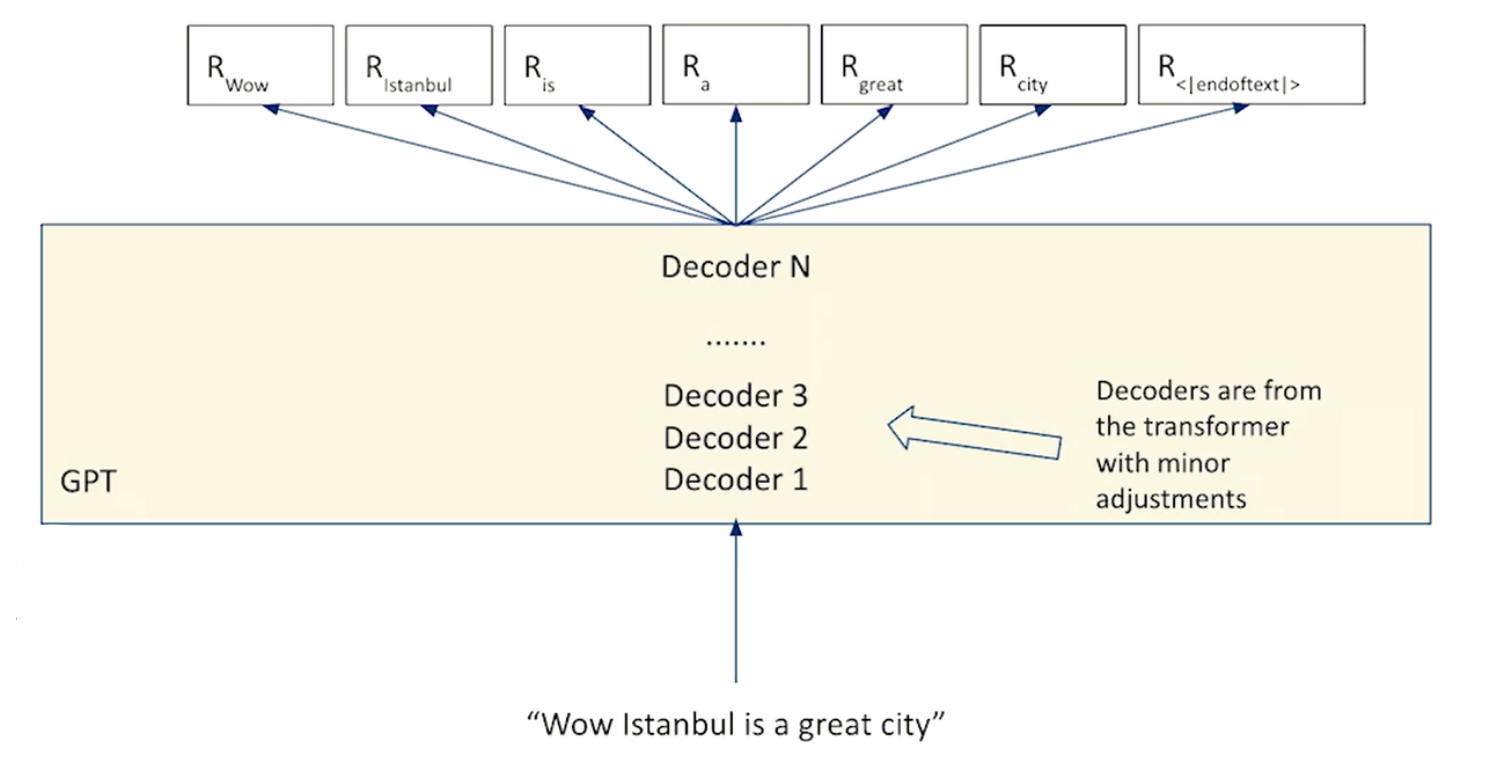

GPT-2 is pre-trained on

WebText (40 Gigabytes of text) Dataset: "All outbound links from Reddit, which received at least 3 karma. This can be thought of as a heuristic indicator for whether other users found the link
interesting, educational, or just funny. The resulting dataset,WebText, contains the text subset of these 45 million links"

GPT-2 popularised Few-shot Learning, as the training set contained exmaples of such tasks. The the WebText training set contains examples of naturally occurring demonstrations. Some are english to French and French to English translation

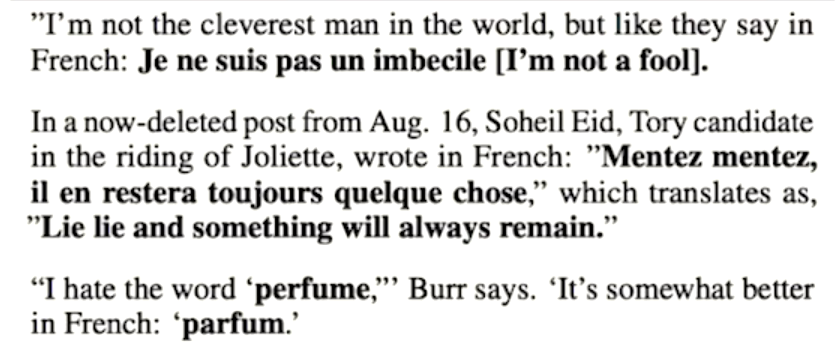

In [1]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer("Hello World. This is Agney")['input_ids']

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

[15496, 2159, 13, 770, 318, 2449, 1681]

In [4]:
tokenizer(" Hello World. This is Agney")['input_ids']

[18435, 2159, 13, 770, 318, 2449, 1681]

In [2]:
tokenizer

GPT2Tokenizer(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}

GPT-2 applies two separate types of embeddings to tokenized sentences:

    Word Token Embeddings (WTE)

Represents context-free meaning of each token with 50,000 possible vectors. 
This is learnable during training    

    Word Position Embeddings (WPE)
    
Used to represent the token's position in the sentence. This is not learnable    

In [3]:
!pip install bertviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 2.9 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for botocore<1.30.0,>=1.29.100 from https://files.pythonhosted.org/packages/46/20/e7a9a8e6746872afcc4e3ad5ab503702c38813b3a532df27cce95c98b8cb/botocore-1.29.165-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 57.7 MB/s eta 0:00:0000:010:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.33.1
    Uninstalling botocore-1.33.1:
      Successfully uninstalled botocore-1.33.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.8.0 requires botocore<1.33.2,>=1.32.4, but you have botocore 1.29.165 which is incompatible.


In [31]:
import torch
from transformers import pipeline, set_seed, GPT2Tokenizer,GPT2LMHeadModel
from torch import tensor,numel
from bertviz import model_view
import pandas as pd

set_seed(42)

In [59]:
generator = pipeline('text-generation',model='gpt2')

generator("Hello, I am Agney and I am a Software Developer at",max_length=30,num_return_sequences=3)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello, I am Agney and I am a Software Developer at the University of Arizona.I was raised in a small town in California to learn the'},
 {'generated_text': 'Hello, I am Agney and I am a Software Developer at Facebook. I wanted to write this for my followers so that they too could be on'},
 {'generated_text': 'Hello, I am Agney and I am a Software Developer at Microsoft.\n\nPlease know that I am not only in the Microsoft team, but'}]

In [8]:
# By default it loads the cased model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

'Agney' in tokenizer.get_vocab()

False

In [9]:
tokenizer.convert_ids_to_tokens(tokenizer.encode('Agney loves to train DL models'))

['Ag', 'ney', 'Ġloves', 'Ġto', 'Ġtrain', 'ĠDL', 'Ġmodels']

In [10]:
tokenizer.encode('Agney loves to train DL models')

[10262, 1681, 10408, 284, 4512, 23641, 4981]

In [11]:
tokenizer.encode('agney loves to train DL models')

[363, 1681, 10408, 284, 4512, 23641, 4981]

In [6]:
model = GPT2LMHeadModel.from_pretrained('gpt2')

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [17]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [42]:
encoded = tokenizer.encode('Agney loves to train DL models',return_tensors='pt')
model.transformer.wte(encoded).shape

torch.Size([1, 7, 768])

In [43]:
model.transformer.wpe(tensor([0,1,2,3,4,5,6]).reshape(1,7)).shape

torch.Size([1, 7, 768])

In [44]:
in_ip = model.transformer.wte(encoded) + model.transformer.wpe(tensor([0,1,2,3,4,5,6]).reshape(1,7))
in_ip.shape

torch.Size([1, 7, 768])

In [45]:
in_ip = model.transformer.drop(in_ip)
in_ip

tensor([[[ 0.1403, -0.2976, -0.0616,  ...,  0.0405,  0.1980,  0.1238],
         [ 0.1928,  0.0561, -0.0121,  ...,  0.1482, -0.1949,  0.1143],
         [-0.0716, -0.1690,  0.0386,  ..., -0.2034, -0.0197, -0.1113],
         ...,
         [ 0.1304, -0.0271,  0.1958,  ...,  0.0857,  0.1632,  0.0726],
         [-0.2261, -0.0656,  0.1254,  ...,  0.0857, -0.1021, -0.0282],
         [-0.1487,  0.0684,  0.1842,  ...,  0.1306,  0.0932, -0.0753]]],
       grad_fn=<AddBackward0>)

In [46]:
for module in model.transformer.h:
    in_ip = module(in_ip)[0]

in_ip =  model.transformer.ln_f(in_ip)   

In [49]:
in_ip

tensor([[[-0.0578, -0.0684, -0.2763,  ..., -0.2680, -0.0396, -0.0371],
         [-0.1789, -0.2259, -0.0601,  ...,  0.2241,  0.1912, -0.1086],
         [ 0.0849,  0.0022, -0.2257,  ..., -0.2161,  0.2136,  0.1241],
         ...,
         [-0.2689,  0.7370, -0.4208,  ...,  0.0213,  0.2345,  0.3032],
         [-0.3449, -0.5953,  0.0507,  ..., -0.4362, -0.5700, -0.5165],
         [-0.5068, -0.3567, -2.1490,  ...,  0.1868,  0.3962,  0.2917]]],
       grad_fn=<NativeLayerNormBackward0>)

In [48]:
model(encoded,output_hidden_states=True).hidden_states[-1]

tensor([[[-0.0578, -0.0684, -0.2763,  ..., -0.2680, -0.0396, -0.0371],
         [-0.1789, -0.2259, -0.0601,  ...,  0.2241,  0.1912, -0.1086],
         [ 0.0849,  0.0022, -0.2257,  ..., -0.2161,  0.2136,  0.1241],
         ...,
         [-0.2689,  0.7370, -0.4208,  ...,  0.0213,  0.2345,  0.3032],
         [-0.3449, -0.5953,  0.0507,  ..., -0.4362, -0.5700, -0.5165],
         [-0.5068, -0.3567, -2.1490,  ...,  0.1868,  0.3962,  0.2917]]],
       grad_fn=<ViewBackward0>)

In [50]:
(in_ip == model(encoded,output_hidden_states=True).hidden_states[-1]).all()

tensor(True)

In [55]:
total_params = 0
for params in model.parameters():
    total_params += numel(params)
    
print(f"total_params : {total_params : ,}")    

total_params :  124,439,808


#### Masked Self Attention

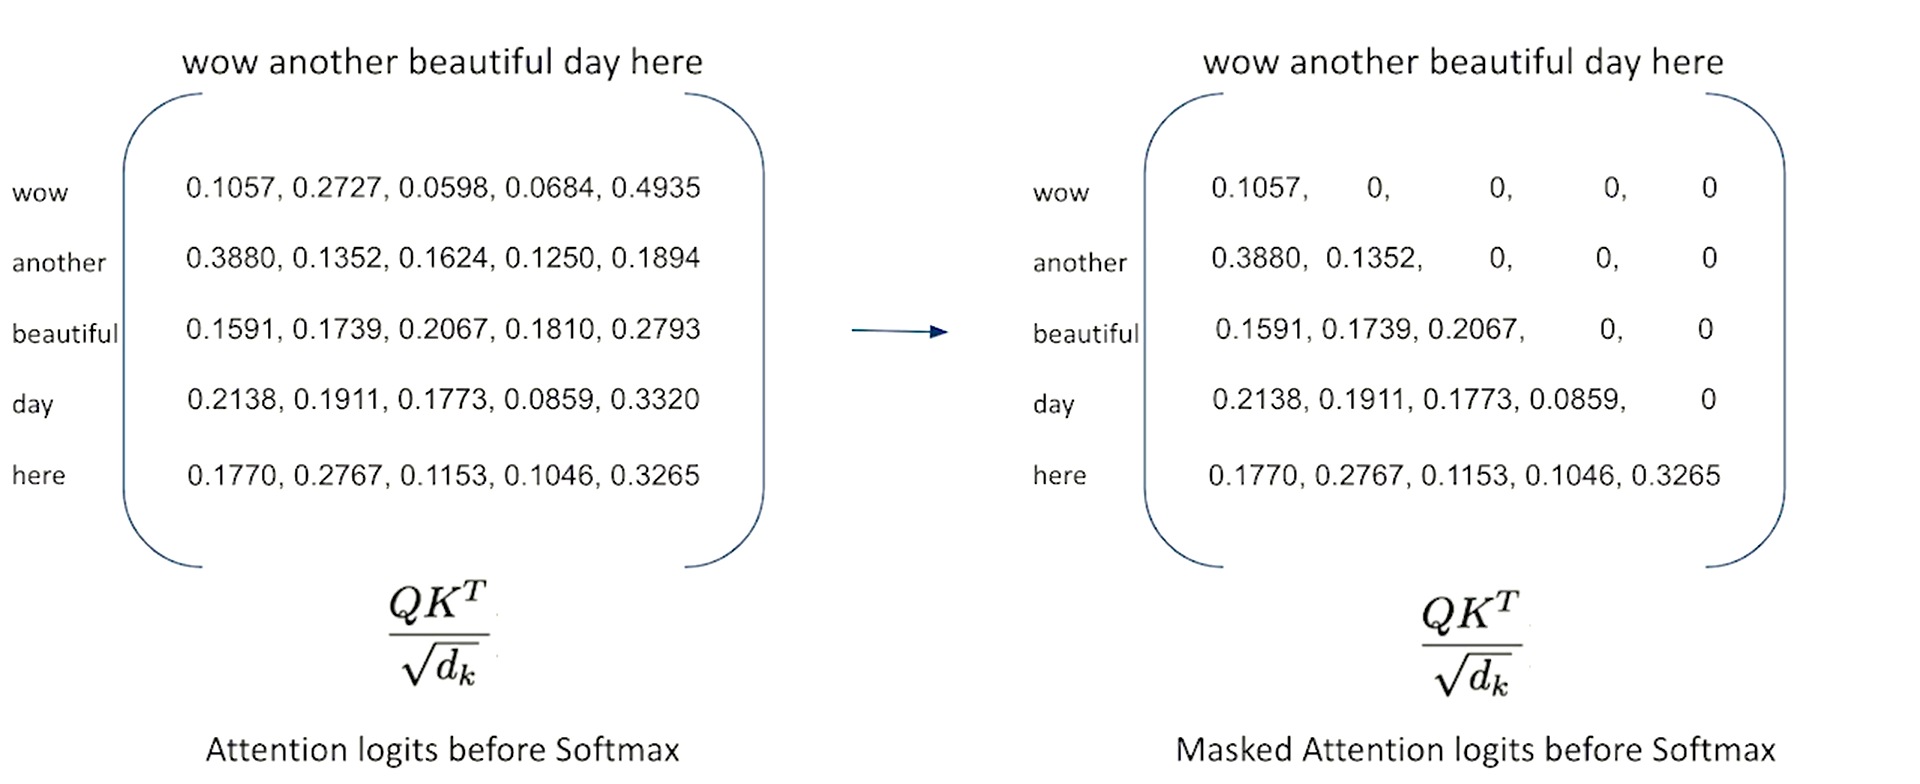

#### Parameters for inference in GPT models

Temperature (float) - Lower (below 1) makes the model more confident
and less random. Higher values make generated text more random.

Top-K Sampling : top_k (int) - How many tokens it considers when generating. 0 to deactivate

Top-P Sampling : top_p (float) - only considers tokens from the top X% of confidences

Beam Search : beams (int) - How many tokens out should we consider

do_sample (bool) - If True, randomness is introduced in selection

In [8]:
text = 'The CS123 class was very intresting. I learned a lot.'
encoded_text = tokenizer(text, return_tensors='pt')

response = model(**encoded_text,output_attentions= True,output_hidden_states=True)

In [10]:
encoded_text

{'input_ids': tensor([[  464,  9429, 10163,  1398,   373,   845,   493,  2118,   278,    13,
           314,  4499,   257,  1256,    13]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [11]:
len(response.attentions)

12

In [15]:
encoded_text['input_ids'].shape

torch.Size([1, 15])

In [14]:
response.attentions[-1].shape # Batch size, no of heads, tokens

torch.Size([1, 12, 15, 15])

In [27]:
# attention in layer 12's 10 head
response.attentions[-1][0][9]

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [9.9361e-01, 6.3864e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [9.5709e-01, 1.3164e-02, 2.9749e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [9.5532e-01, 2.7256e-03, 3.1896e-02, 1.0054e-02, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [9.7097e-01, 1.9785e-03, 1.0814e-02, 6.4244e-03, 9.8152e-03, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
      

In [18]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text['input_ids'][0])
tokens

['The',
 'ĠCS',
 '123',
 'Ġclass',
 'Ġwas',
 'Ġvery',
 'Ġint',
 'rest',
 'ing',
 '.',
 'ĠI',
 'Ġlearned',
 'Ġa',
 'Ġlot',
 '.']

In [32]:
arr = response.attentions[9][0][0]

attention_df = pd.DataFrame((torch.round(arr*10**3)/(10**3)).detach()).applymap(float)

attention_df.columns = tokens
attention_df.index = tokens

attention_df

,The,ĠCS,123,Ġclass,Ġwas,Ġvery,Ġint,rest,ing,.,ĠI,Ġlearned,Ġa,Ġlot,.
The,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
ĠCS,0.964,0.036,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
123,0.772,0.064,0.164,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
Ġclass,0.906,0.027,0.035,0.032,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
Ġwas,0.355,0.021,0.047,0.463,0.114,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
Ġvery,0.405,0.010,0.028,0.203,0.333,0.021,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
Ġint,0.885,0.005,0.019,0.034,0.044,0.008,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
rest,0.975,0.002,0.002,0.001,0.003,0.003,0.005,0.009,0.000,0.000,0.000,0.000,0.000,0.000,0.00
ing,0.727,0.015,0.013,0.054,0.058,0.004,0.007,0.005,0.115,0.000,0.000,0.000,0.000,0.000,0.00
.,0.662,0.073,0.048,0.087,0.017,0.003,0.013,0.003,0.027,0.067,0.000,0.000,0.000,0.000,0.00


In [41]:
model_view(response.attentions,tokens)

<IPython.core.display.Javascript object>

In [54]:
response.hidden_states[-1].shape

torch.Size([1, 15, 768])

In [55]:
response.logits.shape

torch.Size([1, 15, 50257])

In [57]:
pd.DataFrame(
    zip(tokens,tokenizer.convert_ids_to_tokens(response.logits.argmax(2)[0])),
    columns = ['Sequence given','Next token with highest prob']
)

,Sequence given,Next token with highest prob
0,The,Ċ
1,ĠCS,IRO
2,123,Ġis
3,Ġclass,Ġis
4,Ġwas,Ġintroduced
5,Ġvery,Ġpopular
6,Ġint,ract
7,rest,ing
8,ing,.
9,.,ĠIt


In [62]:
generator(text,max_length=30,num_return_sequences=1,do_sample=False)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'The CS123 class was very intresting. I learned a lot. I learned a lot about the language. I learned a lot about the people'}]

In [63]:
generator(text,max_length=30,num_return_sequences=1,do_sample=True)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "The CS123 class was very intresting. I learned a lot. I didn't know what to do with them alleged to be there because it"}]

In [72]:
# Few Shot Learning

print(generator("""Sentiment Analysis
Text: I hate it when my phone battery dies.
Sentiment: Negative
###
Text: My day has been really great!
Sentiment: Positive
###
Text: This new music video was so bad.
Sentiment:""", top_k=2, temperature=0.1, max_length=55)[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Sentiment Analysis
Text: I hate it when my phone battery dies.
Sentiment: Negative
###
Text: My day has been really great!
Sentiment: Positive
###
Text: This new music video was so bad.
Sentiment: Negative


In [92]:
print(generator("""Question/Answering
C: Google was founded in 1998 by Larry Page and Sergey Brian while they were Ph.D students at Stanford University in California.
Q: When was Google founded?
A: 1998
###
C: Hugging Face is a company which develops social AI-run chatbot applications. It was established in 2016 by Clement 
Q: What does Hugging Face develop?
A: social A1—run chatbot applications
###
C: Real Madrid is a spanish profesional football club, They have won 14 Champions League Titles.
Q: How many Champions title have Real Madrid won?
A: """,top_k=2,max_length=250,temperature=0.7)[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question/Answering
C: Google was founded in 1998 by Larry Page and Sergey Brian while they were Ph.D students at Stanford University in California.
Q: When was Google founded?
A: 1998
###
C: Hugging Face is a company which develops social AI-run chatbot applications. It was established in 2016 by Clement 
Q: What does Hugging Face develop?
A: social A1—run chatbot applications
###
C: Real Madrid is a spanish profesional football club, They have won 14 Champions League Titles.
Q: How many Champions title have Real Madrid won?
A:  The club won the Champions League in 2015.
###
C: The club has won the Champions League in 2014.
Q: How many Champions title have Real Madrid won?
A:  The club won the Champions League in 2014.
###
C: The club has won the Champions League in 2013.
Q: How many Champions title have Real Madrid won?
A:  The club won the Champions League in 2013.
###
C: The club has won the Champions League in 2012.
Q: What is the most


In [95]:
to_summarise = """Even computing a single attention matrix, however, can become impractical for very large inputs. We instead use sparse attention patterns, where each output position only computes weightings from a subset of input positions. When the subset is small relative to the full set of inputs (say, \(N'\) elements instead of \(N\) elements), the resulting attention computation becomes tractable even for very long sequences, with an algorithmic complexity of \(O(N \cdot N')\) instead of \(O(N^2)\).
To assess the feasibility of the approach, we first visualized the learned attention patterns for deep Transformers on images, finding that many showed interpretable and structured sparsity patterns. Each of the below images shows which input pixels (highlighted in white) are attended to by a given attention head in order to predict the next value in the image. When the input portions are focused on small subsets and show a high degree of regularity, the layer is amenable to sparsification."""
print(generator(f""" Summarise:\n{to_summarise}\nTL:DR:""",max_length=512,top_k=3,temperature=0.5,no_repeat_ngram_size=3)[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


 Summarise:
Even computing a single attention matrix, however, can become impractical for very large inputs. We instead use sparse attention patterns, where each output position only computes weightings from a subset of input positions. When the subset is small relative to the full set of inputs (say, \(N'\) elements instead of \(N\) elements), the resulting attention computation becomes tractable even for very long sequences, with an algorithmic complexity of \(O(N \cdot N')\) instead of \(O(N^2)\).
To assess the feasibility of the approach, we first visualized the learned attention patterns for deep Transformers on images, finding that many showed interpretable and structured sparsity patterns. Each of the below images shows which input pixels (highlighted in white) are attended to by a given attention head in order to predict the next value in the image. When the input portions are focused on small subsets and show a high degree of regularity, the layer is amenable to sparsification